In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import cifar10
from keras.datasets import mnist
from keras.layers import Conv2D, Flatten
from keras.layers import MaxPooling2D
from keras.optimizers import SGD
import numpy as np
import numpy.random as nr
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score
nc=10#Number of classes

In [2]:
(Xtrain,ytrain),(Xtest,ytest)=cifar10.load_data()

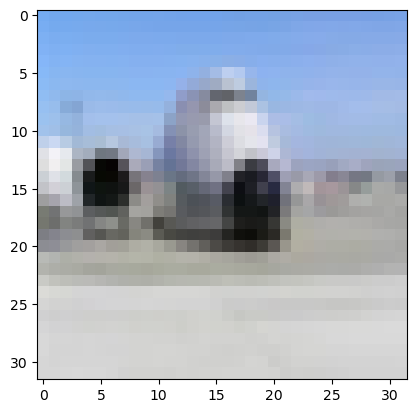

In [6]:
#show sample images
import random
plt.figure(1)
imgplot1=plt.imshow(Xtrain[random.randint(0,60000)])
plt.show()

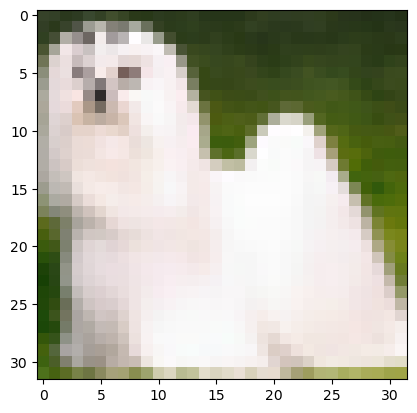

In [7]:
import random
plt.figure(2)
imgplot1=plt.imshow(Xtrain[random.randint(0,60000)])
plt.show()

In [3]:
Xtrain=Xtrain.astype("float32")
Xtrain=Xtrain[0:20000,:]/255.0
Xtest=Xtest.astype("float32")
Xtest=Xtest/255.0

In [4]:
ytrain=ytrain[:,0]
ytrainEnc=tf.one_hot(ytrain[0:20000],depth=nc)
ytest=ytest[:,0]
ytestEnc=tf.one_hot(ytest,depth=nc)

In [5]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation="relu",kernel_initializer="he_uniform",padding="same",input_shape=(32,32,3)))
model.add(Conv2D(32,(3,3),activation="relu",kernel_initializer="he_uniform",padding="same"))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation="relu",kernel_initializer="he_uniform",padding="same"))
model.add(Conv2D(64,(3,3),activation="relu",kernel_initializer="he_uniform",padding="same"))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3),activation="relu",kernel_initializer="he_uniform",padding="same"))
model.add(Conv2D(128,(3,3),activation="relu",kernel_initializer="he_uniform",padding="same"))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(128,activation="relu",kernel_initializer="he_uniform"))
model.add(Dense(10,activation="softmax"))
opt=SGD(learning_rate=0.001,momentum=0.9)
model.compile(optimizer=opt,loss="categorical_crossentropy",metrics=["accuracy"])

In [6]:
history=model.fit(Xtrain,ytrainEnc,epochs=10,batch_size=550,validation_data=(Xtest,ytestEnc))

Epoch 1/10
37/37 [==============================] - 229s 6s/step - loss: 2.2961 - accuracy: 0.1574 - val_loss: 2.1833 - val_accuracy: 0.2405
Epoch 2/10
37/37 [==============================] - 191s 5s/step - loss: 2.0957 - accuracy: 0.2641 - val_loss: 1.9903 - val_accuracy: 0.2879
Epoch 3/10
37/37 [==============================] - 208s 6s/step - loss: 1.9474 - accuracy: 0.3047 - val_loss: 1.9141 - val_accuracy: 0.3174
Epoch 4/10
37/37 [==============================] - 234s 6s/step - loss: 1.8709 - accuracy: 0.3379 - val_loss: 1.8284 - val_accuracy: 0.3569
Epoch 5/10
37/37 [==============================] - 223s 6s/step - loss: 1.7945 - accuracy: 0.3694 - val_loss: 1.7777 - val_accuracy: 0.3777
Epoch 6/10
37/37 [==============================] - 225s 6s/step - loss: 1.7422 - accuracy: 0.3843 - val_loss: 1.7125 - val_accuracy: 0.3971
Epoch 7/10
37/37 [==============================] - 248s 7s/step - loss: 1.6872 - accuracy: 0.4095 - val_loss: 1.6866 - val_accuracy: 0.4002
Epoch 8/10
37

In [115]:
Xtest.shape

(10000, 32, 32, 3)

In [103]:
#Xtest=tf.reshape(Xtest,(Xtest.shape[0],-1))


In [105]:
#Xtest=tf.cast(Xtest,tf.float32)/255

In [112]:
ypred=model.predict(Xtest)
ypred=np.argmax(ypred,axis=1)

313/313 [==============================] - 24s 77ms/step


In [56]:
yestEnc.shape

TensorShape([10000, 10])

In [97]:
ypred.shape

(10000, 10)

In [113]:
score=accuracy_score(ypred,ytest)*100
score

37.64

In [7]:
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [ ]:
def plot_sample(X, y, idx):
    plt.figure(figsize = (15,2))
    plt.imshow(X[idx])
    plt.xlabel(classes[y[idx]])